# Projet P6 - Analysez les ventes d'une librairie avec R ou Python

*OPENCLASSROOMS - Parcours Data Analyst V2 - Adeline Le Ray - Novembre 2022*
<hr>

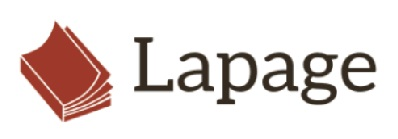

## <font color='blue'>Sommaire</font>
**[Présentation du projet](#Presentation_projet)**
* [1. Rappel du contexte](#0_1)
* [2. Données sources](#0_2)
* [3. Objectifs de la mission](#0_3)
* [4. Analyses à réaliser](#0_4)
* [5. Démarche](#0_5)

**[Partie 1 - Importation et Inspection des fichiers de données](#partie1)**
* [1. Importation des librairies](#1_1)
* [2. Importation et inspection des fichiers de données](#1_2)
    
**[Partie 2 - Nettoyage des données](#partie2)**
* [1. Types de variables](#2_1)
* [2. Valeurs manquantes](#2_2)
* [3. Doublons](#2_3)
* [4. Valeurs aberrantes](#2_4)
    

## <font color='blue'>Présentation du projet<a class="anchor" id="Presentation_projet"></a></font>

### 1. Rappel du contexte<a class="anchor" id="0_1"></a>

Lapage était originellement une librairie physique avec plusieurs points de vente. Mais devant le succès de certains de ses produits et l’engouement de ses clients, elle a décidé depuis 2 ans d’ouvrir un site de vente en ligne. Vous intervenez car l’entreprise souhaite faire le point après deux ans d’exercice, et pouvoir analyser ses points forts, ses points faibles, les comportements clients, etc.

Mon rôle : consultante Data Analyst chez Lapage, directement rattachée au service Marketing.


### 2. Données sources<a class="anchor" id="0_2"></a>
Les fichiers source utilisés sont les suivants:
- 'customers.csv'
- 'products.csv'
- 'transactions.csv'


### 3. Objectifs de la mission<a class="anchor" id="0_3"></a>

Faire le point sur les 2 ans de ventes en ligne pour décider de la marche à suivre, par exemple décider si nous devons créer certaines offres, adapter certains prix, etc.

1. Une analyse des différents indicateurs de vente
    - Chiffre d'affaires
        - Différents indicateurs et graphiques autour du chiffre d'affaires
        - Evolution dans le temps du chiffre d'affaires et mettre en place une décomposition en moyenne mobile pour évaluer la tendance globale
    - Ventes
        - Tops et flops des références 
        - Répartition par catégorie
    - Profils clients
        - Informations sur les profils de nos clients
        - Répartition du chiffre d'affaires entre les profils clients, via par exemple une courbe de Lorenz.
2. Une analyse plus ciblée sur les clients pour comprendre le comportement de nos clients en ligne, pour pouvoir ensuite comparer avec la connaissance acquise via nos librairies physiques. 
    - Lien entre le genre d’un client et les catégories des livres achetés
    - Lien entre l’âge des clients et le montant total des achats, la fréquence d’achat, la taille du panier moyen et les catégories des livres achetés.

    
### 5. Démarche<a class="anchor" id="0_5"></a> 
La démarche utilisée pour réaliser le projet se découpe en 3 parties :

1. Importation et inspection des fichiers de données
2. Nettoyage des données
3. Analyse des données

Les différentes parties sont détaillées ci-dessous.

*Nota : df = data frame dans le notebook*

## <font color='blue'>Partie 1 - Importation et inspection des fichiers de données<a class="anchor" id="partie1"></a></font>

### 1. Importation des librairies

In [1]:
# Importation des librairies pandas, numpy, pyplot de matplotlib, seaborn, plotly, datetime
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### 2. Importation et inspection des fichiers de données<a class="anchor" id="1_2"></a>

La démarche de l'inspection des fichiers de données est la suivante :
* Importation
* Aperçu du data frame
* Dimension du data frame

#### a. Fichier 'Customers'<a class="anchor" id="1_2_1"></a>

In [2]:
# Importation et aperçu du data frame
df_customers=pd.read_csv('customers.csv')
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [3]:
# Dimensions du data frame
df_customers.shape

(8623, 3)

Le data frame **'customers'** comprends 3 colonnes :
- **client_id** : identifiant client
- **sex** : genre du client
- **birth** : année de naissance du client

#### b. Fichier 'Products'<a class="anchor" id="1_2_2"></a>

In [4]:
# Importation et aperçu du data frame
df_products=pd.read_csv('products.csv')
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [5]:
# Dimensions du data frame
df_products.shape

(3287, 3)

Le data frame **'products'** comprends 3 colonnes :
- **id_prod** : référence du livre
- **price** : prix unitaire
- **categ** : catégorie du livre

#### c. Fichier 'Transactions'<a class="anchor" id="1_2_3"></a>

In [6]:
df_transactions=pd.read_csv('transactions.csv')
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [7]:
df_transactions.shape

(679532, 4)

Le data frame **'transactions'** comprends 4 colonnes :
- **id_prod** : référence du livre
- **date** : date d'achat (format : AAAA-MM-JJ hh:mm:ss.microseconde)
- **session_id** : identifiant de la session d'achat
- **client_id** : identifiant client

## <font color='blue'>Partie 2 - Nettoyage des données <a class="anchor" id="partie2"></a></font>

La partie Nettoyage des données comprend les étapes suivantes :
* [1. Types de variables](#2_1)
* [2. Valeurs manquantes](#2_2)
* [3. Doublons](#2_3)
* [4. Valeurs aberrantes](#2_4)


### 1. Types de variables<a class="anchor" id="2_1"></a>

L'objectif est de vérifier que les variables sont bien du bon type et de corriger les erreurs éventuelles.

#### a. Data frame 'df_customers'<a class="anchor" id="2_1_1"></a>

In [8]:
#Types de variables
df_customers.dtypes

client_id    object
sex          object
birth         int64
dtype: object

=> Pas d'erreur de type de variable.

#### b. Data frame 'df_products'<a class="anchor" id="2_1_2"></a>

In [9]:
#Types de variables
df_products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

=> Pas d'erreur de type de variable.

#### c. Data frame 'df_transactions'<a class="anchor" id="2_1_3"></a>

In [10]:
#Types de variables
df_transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

La variable **date** n'est pas de type une date => à convertir.

Erreur détectée lors de la conversion en date "Unknown string format: test_2021-03-01 02:30:02.237419" => recherche des lignes correspondantes.

In [11]:
# Visualisation des lignes date="test_2021-03-01 02:30:02.237419"
df_transactions.loc[df_transactions['date']=='test_2021-03-01 02:30:02.237419',:]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
168341,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
185962,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_1
311604,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_1


Il s'agit de lignes de tests enregistrés dans la base de données Transactions. L'id_prod pour le test est 'T_0'.

In [12]:
# Nombre d'occurences de 'T_0'
print("Nombre de 'T_0' pour la variable 'id_prod':")
print(df_transactions.loc[df_transactions['id_prod']=='T_0',:].shape[0])

Nombre de 'T_0' pour la variable 'id_prod':
200


In [13]:
#Conversion en format date et remplacement des erreurs par 'NaT'
df_transactions['date']=pd.to_datetime(df_transactions['date'],errors='coerce')

In [14]:
# Type de variables
df_transactions.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

In [15]:
# Nombre de lignes avec date = NaT
print("Nombre de 'NaT' pour la variable 'Date':")
print(df_transactions.loc[df_transactions['date'].isna(),:].shape[0])

Nombre de 'NaT' pour la variable 'Date':
200


In [16]:
# Suppression des lignes de tests
df_transactions=df_transactions.loc[df_transactions['date'].notna(),:]

# Dimensions du df
df_transactions.shape

(679332, 4)

### 2. Valeurs manquantes<a class="anchor" id="2_2"></a>

L'objectif est d'identifier les éventuelles valeurs manquantes et de définir le traitement à effectuer.

#### a. Data frame 'df_customers'<a class="anchor" id="2_2_1"></a>

In [17]:
# affichage du nombre de valeurs manquantes pour chaque colonne
df_customers.isna().sum()

client_id    0
sex          0
birth        0
dtype: int64

#### b. Data frame 'df_products'<a class="anchor" id="2_2_2"></a>

In [18]:
# affichage du nombre de valeurs manquantes pour chaque colonne
df_products.isna().sum()

id_prod    0
price      0
categ      0
dtype: int64

#### c. Data frame 'df_transactions'<a class="anchor" id="2_2_3"></a>

In [19]:
# affichage du nombre de valeurs manquantes pour chaque colonne
df_transactions.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

### 3. Doublons <a class="anchor" id="2_3"></a>

L'objectif est d'identifier les éventuels doublons et de les traiter.

#### a. Data frame 'df_customers'<a class="anchor" id="2_3_1"></a>

In [20]:
# Nombre de doublons dans les lignes
df_customers.duplicated().sum()

0

Le 'client_id' doit être unique car il s'agit ici de la base de données des clients.

In [21]:
# Nombre de doublons de client_id
df_customers['client_id'].duplicated().sum()

0

#### b. Data frame 'df_products'<a class="anchor" id="2_3_2"></a>

In [22]:
# Nombre de doublons dans les lignes
df_products.duplicated().sum()

0

Le 'id_prod' doit être unique car il s'agit ici de la base de données des livres.

In [23]:
# Nombre de doublons de id_prod
df_products['id_prod'].duplicated().sum()

0

#### c. Data frame 'df_transactions'<a class="anchor" id="2_2_3"></a>

In [24]:
# Nombre de doublons dans les lignes
df_transactions.duplicated().sum()

0

Dans la base de données 'Transactions', l'identifiant 'session_id' associé à 'date' doit être unique.

In [25]:
# Nombre de doublons de date/session_id
df_transactions[['date','session_id']].duplicated().sum()

0

### 4. Valeurs aberrantes <a class="anchor" id="2_4"></a>

L'objectif est d'identifier les éventuels valeurs aberrantes et de les traiter.

#### a. Data frame 'df_customers'<a class="anchor" id="2_4_1"></a>

In [26]:
# Ajout de la colonne âge, année actuelle = 2023 d'après le fichier de transactions
df_customers['age']=2023-df_customers['birth']

In [27]:
# Données statistiques 
df_customers.describe(include='all')

,client_id,sex,birth,age
count,8623,8623,8623.000000,8623.000000
unique,8623,2,NaN,NaN
top,c_4410,f,NaN,NaN
freq,1,4491,NaN,NaN
mean,NaN,NaN,1978.280877,44.719123
std,NaN,NaN,16.919535,16.919535
min,NaN,NaN,1929.000000,19.000000
25%,NaN,NaN,1966.000000,31.000000
50%,NaN,NaN,1979.000000,44.000000
75%,NaN,NaN,1992.000000,57.000000


L'âge des clients s'étale de 19 ans à 94 ans.

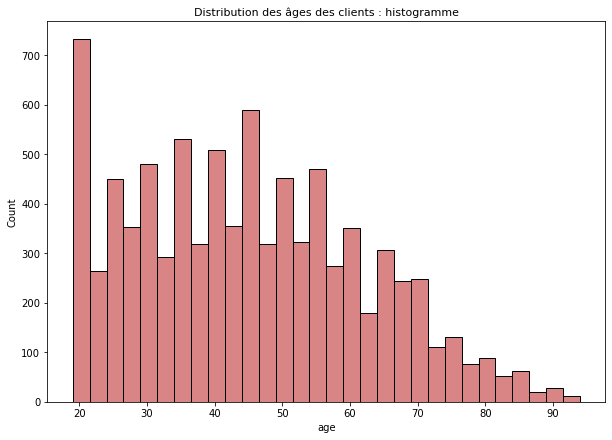

In [28]:
#Répartition de l'âge des clients : histogramme
plt.figure(figsize=(10,7))
sns.histplot(data=df_customers,x='age',color='indianred')
plt.title('Distribution des âges des clients : histogramme',fontsize=11)
plt.show()

Les clients ont majoritairement entre 19 et 70 ans. 

In [29]:
# Recherche des profils clients tests : ct_0 et ct_1
df_customers.loc[(df_customers['client_id']=='ct_0')&(df_customers['client_id']=='ct_1')]

,client_id,sex,birth,age


#### b. Data frame 'df_products'<a class="anchor" id="2_4_2"></a>

In [30]:
# Données statistiques 
df_products.describe(include='all')

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


Les prix des livres vont de -1 à 300 €. -1 est une valeur aberrante à supprimer.

In [31]:
df_products.loc[df_products['price']<=0,:]

,id_prod,price,categ
731,T_0,-1.0,0


Le prix négatif correspond au produit utilisé pour les tests dans le df transactions.

In [32]:
# Seuls les prix > 0 sont retenus
df_products=df_products.loc[df_products['price']>0,:]

#### Prix des livres par catégorie

Le prix des livres est majoritairement entre 0 et 50€.

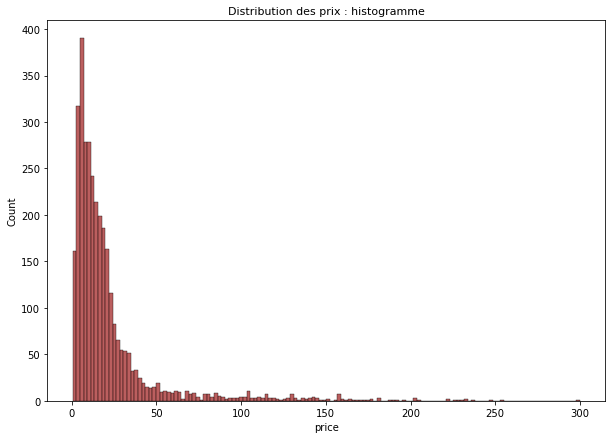

In [33]:
#Répartition des prix de ventes : histogramme
plt.figure(figsize=(10,7))
sns.histplot(data=df_products,x='price',color='brown')
plt.title('Distribution des prix : histogramme',fontsize=11)
plt.show()

Il y a 3 catégories de livres proposées à la vente 0, 1 et 2 :
- Catégorie 0 : prix de 0,62€ à 40,99€, prix moyen 11,73€
- Catégorie 1 : prix de 2,00€ à 80,99€, prix moyen 25,53€
- Catégorie 2 : prix de 30,99€ à 300,00€, prix moyen 108,35€

In [34]:
# Modalités de 'categ'
df_products['categ'].unique()

array([0, 1, 2], dtype=int64)

In [35]:
for cat in df_products['categ'].unique():
    subset = df_products[df_products.categ == cat]
    print("-"*20)
    print("Catégorie de livres",cat)
    print("min:",subset['price'].min())
    print("max:",subset['price'].max())
    print("moy:",round(subset['price'].mean(),2))
    print("med:",round(subset['price'].median(),2))
    print("mod:",round(subset['price'].mode(),2))
    print("var:",round(subset['price'].var(ddof=0),2))
    print("ect:",round(subset['price'].std(ddof=0),2))

--------------------
Catégorie de livres 0
min: 0.62
max: 40.99
moy: 11.73
med: 10.32
mod: 0    4.99
Name: price, dtype: float64
var: 57.22
ect: 7.56
--------------------
Catégorie de livres 1
min: 2.0
max: 80.99
moy: 25.53
med: 22.99
mod: 0    22.99
1    32.99
Name: price, dtype: float64
var: 237.61
ect: 15.41
--------------------
Catégorie de livres 2
min: 30.99
max: 300.0
moy: 108.35
med: 101.99
mod: 0    50.99
1    68.99
2    69.99
Name: price, dtype: float64
var: 2446.06
ect: 49.46


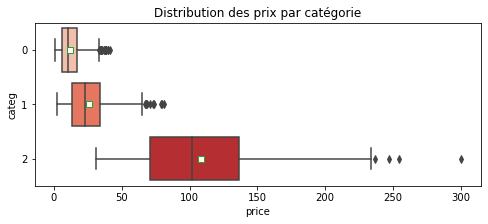

In [36]:
# Distribution et moyenne des prix par catégorie
plt.figure(figsize=(8,3))
sns.boxplot(data=df_products, y='categ', x='price', 
            orient='h', 
            showfliers=True, 
            showmeans=True, 
            palette="Reds", 
            meanprops={"marker":"s","markerfacecolor":"white"})
plt.title('Distribution des prix par catégorie')
plt.show()

#### c. Data frame 'df_transactions'<a class="anchor" id="2_4_3"></a>

In [37]:
# Données statistiques 
df_transactions.describe(datetime_is_numeric=True,include='all')

,id_prod,date,session_id,client_id
count,679332,679332,679332,679332
unique,3266,NaN,342315,8600
top,1_369,NaN,s_118668,c_1609
freq,2252,NaN,14,25488
mean,NaN,2022-03-03 15:13:19.307389696,NaN,NaN
min,NaN,2021-03-01 00:01:07.843138,NaN,NaN
25%,NaN,2021-09-08 09:14:25.055994368,NaN,NaN
50%,NaN,2022-03-03 07:50:20.817730560,NaN,NaN
75%,NaN,2022-08-30 23:57:08.555173888,NaN,NaN
max,NaN,2023-02-28 23:58:30.792755,NaN,NaN


Les dates sont cohérentes avec la plage de 2 ans de fonctionnement de la boutique en ligne : mars 2021 à fin février 2023.

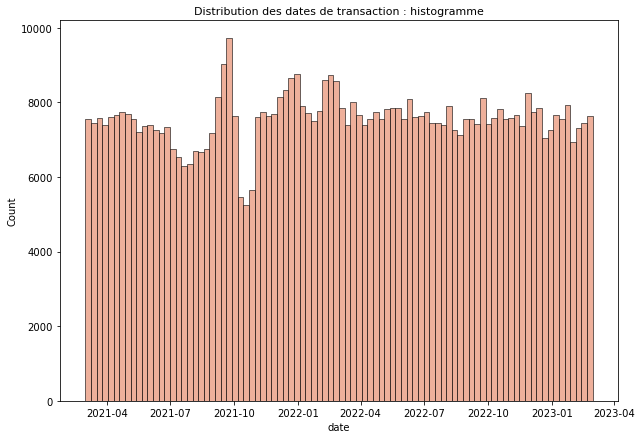

In [38]:
#Répartition des prix de ventes : histogramme
plt.figure(figsize=(10,7))
sns.histplot(data=df_transactions,x='date',color='darksalmon')
plt.title('Distribution des dates de transaction : histogramme',fontsize=11)
plt.show()

In [39]:
# Enregistrement des dataframes nettoyés en .csv
df_transactions.to_csv('df_transactions.csv')
df_products.to_csv('df_products.csv')
df_customers.to_csv('df_customers.csv')